In [1]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Select tickers
tickers = ['BHP', 'AAPL', 'CBA.AX', 'MSFT', 'META', 'TSLA']

# Download stock data
data = yf.download(tickers, start='2021-1-1', auto_adjust=False, multi_level_index=False) # Note, all you need for this is the 'Adj Close' columns

# Confirm download
data.tail(10)

[*********************100%***********************]  6 of 6 completed


Price        Adj Close                                                 \
Ticker            AAPL        BHP      CBA.AX        META        MSFT   
Date                                                                    
2025-12-31  271.859985  60.369999  160.570007  660.090027  483.619995   
2026-01-02  271.010010  61.759998  161.119995  650.409973  472.940002   
2026-01-05  267.260010  63.139999  160.580002  658.789978  472.850006   
2026-01-06  262.359985  64.800003  155.850006  660.619995  478.510010   
2026-01-07  260.329987  63.860001  153.229996  648.690002  483.470001   
2026-01-08  259.040009  62.950001  153.339996  646.059998  478.109985   
2026-01-09  259.369995  61.720001  153.220001  653.059998  479.279999   
2026-01-12  260.250000  62.799999  154.080002  641.969971  477.179993   
2026-01-13  261.049988  63.990002  154.820007  631.090027  470.670013   
2026-01-14         NaN        NaN  152.119995         NaN         NaN   

Price                        Close                                     ...  \
Ticker            TSLA        AAPL        BHP      CBA.AX        META  ...   
Date                                                                   ...   
2025-12-31  449.720001  271.859985  60.369999  160.570007  660.090027  ...   
2026-01-02  438.070007  271.010010  61.759998  161.119995  650.409973  ...   
2026-01-05  451.670013  267.260010  63.139999  160.580002  658.789978  ...   
2026-01-06  432.959991  262.359985  64.800003  155.850006  660.619995  ...   
2026-01-07  431.410004  260.329987  63.860001  153.229996  648.690002  ...   
2026-01-08  435.799988  259.040009  62.950001  153.339996  646.059998  ...   
2026-01-09  445.010010  259.369995  61.720001  153.220001  653.059998  ...   
2026-01-12  448.959991  260.250000  62.799999  154.080002  641.969971  ...   
2026-01-13  447.200012  261.049988  63.990002  154.820007  631.090027  ...   
2026-01-14         NaN         NaN        NaN  152.119995         NaN  ...   

Price             Open                                          Volume  \
Ticker          CBA.AX        META        MSFT        TSLA        AAPL   
Date                                                                     
2025-12-31  161.289993  664.750000  487.839996  456.100006  27293600.0   
2026-01-02  160.600006  662.729980  484.390015  457.799988  37838100.0   
2026-01-05  161.119995  651.010010  474.059998  447.989990  45647200.0   
2026-01-06  160.899994  659.570007  473.799988  446.380005  52352100.0   
2026-01-07  155.679993  655.640015  479.760010  435.899994  48309800.0   
2026-01-08  153.449997  645.880005  481.239990  427.890015  50419300.0   
2026-01-09  154.589996  645.440002  474.059998  435.950012  39997000.0   
2026-01-12  153.800003  652.530029  476.670013  441.230011  45263800.0   
2026-01-13  155.000000  642.270020  474.679993  450.200012  45697500.0   
2026-01-14  154.199997         NaN         NaN         NaN         NaN   

Price                                                                 
Ticker            BHP     CBA.AX        META        MSFT        TSLA  
Date                                                                  
2025-12-31  3443500.0  1008187.0   7940400.0  15601600.0  49078000.0  
2026-01-02  2058800.0   836803.0  13726500.0  25571600.0  85535400.0  
2026-01-05  4944400.0   959469.0  12213700.0  25250300.0  67940800.0  
2026-01-06  4058000.0  2312277.0  11074400.0  23037700.0  89093800.0  
2026-01-07  2584200.0  1621283.0  12846300.0  25564200.0  59828800.0  
2026-01-08  4159000.0  1943053.0  11921700.0  18162600.0  57041100.0  
2026-01-09  6063600.0  1599030.0  11634900.0  18491000.0  67331500.0  
2026-01-12  4871500.0  1085692.0  14797200.0  23519900.0  61649600.0  
2026-01-13  3372700.0  1324215.0  18003200.0  28514200.0  53557200.0  
2026-01-14        NaN   781369.0         NaN         NaN         NaN  

[10 rows x 36 columns]

In [3]:
# Prepare Dataset

# First calculate log returns for each Adj Close
log_returns = np.log(data['Adj Close']/data['Adj Close'].shift(1))
print(f"Number before drop NAs: {len(log_returns)}")

# Drop null values (can lead to incorrect results)
log_returns = log_returns.dropna()
print(f"Number after drop NAs:{len(log_returns)}")

# Number of assets in portfolio
number_of_assets = len(data['Adj Close'].columns)

Number before drop NAs: 1300
Number after drop NAs:1174


In [4]:
# Initialise lists
portfolio_returns = []
portfolio_volatility = []
portfolio_weights = []

# Run a for loop to generate combinations of returns based on weights. Higher range value, the longer compute.
for x in range(1000000):
    weights = np.random.random(number_of_assets)
    weights /= np.sum(weights)
    portfolio_weights.append(weights)

    portfolio_returns.append(np.sum(weights * log_returns.mean() * 252)) # 252 are trading days
    portfolio_volatility.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))))

portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)
portfolio_weights = np.array(portfolio_weights)

# Calculate the Sharpe Ratio to find Efficient Portfolio
sharpe_ratios = portfolio_returns / portfolio_volatility

# Identify the Index of the Maximum Sharpe Ratio
max_sr_index = np.argmax(sharpe_ratios)

# Retrieve the metrics for the most Efficient Portfolio
max_sr_ret = portfolio_returns[max_sr_index]
max_sr_vol = portfolio_volatility[max_sr_index]
max_sr_weights = portfolio_weights[max_sr_index]

# Print the Optimal Weights
print(f"Most Efficient Portfolio (Max Sharpe Ratio: {sharpe_ratios[max_sr_index]:.2f})")
print(f"Annualised Return: {max_sr_ret:.2%}")
print(f"Annualised Volatility: {max_sr_vol:.2%}")
print("-" * 40)
print("Portfolio Allocation:")
for ticker, weight in zip(tickers, max_sr_weights):
    print(f"{ticker}: {weight:.2%}")

Most Efficient Portfolio (Max Sharpe Ratio: 1.03)
Annualised Return: 15.55%
Annualised Volatility: 15.16%
----------------------------------------
Portfolio Allocation:
BHP: 13.90%
AAPL: 14.42%
CBA.AX: 49.13%
MSFT: 1.01%
META: 20.94%
TSLA: 0.60%


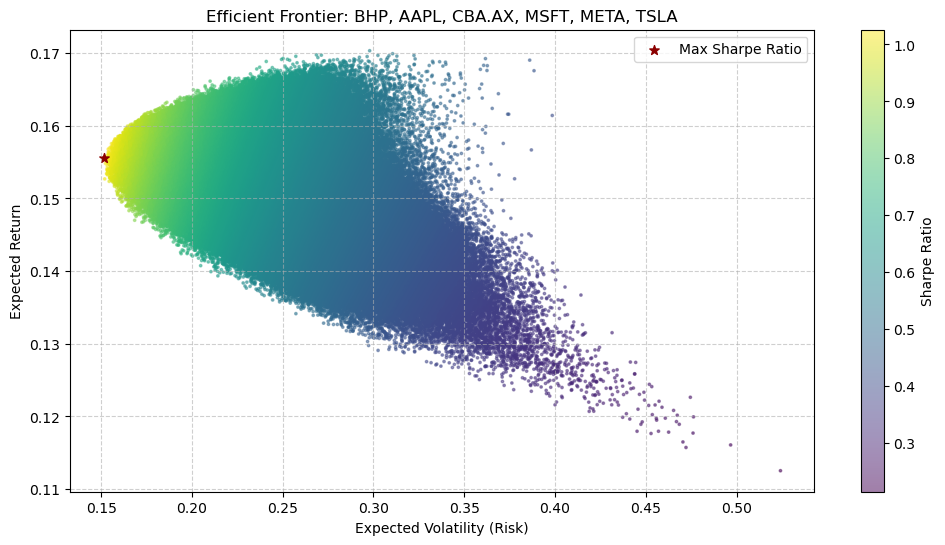

In [5]:
# Plotting the Efficient Frontier with the Max Sharpe Ratio Point
plt.figure(figsize=(12, 6))

# Plot all portfolios, colored by Sharpe Ratio
scatter = plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratios, cmap='viridis', marker='o', s=3, alpha=0.5)
plt.colorbar(scatter, label='Sharpe Ratio')

# Highlight the Maximum Sharpe Ratio Portfolio with a Red Star
plt.scatter(max_sr_vol, max_sr_ret, c='darkred', marker='*', s=50, label='Max Sharpe Ratio')

plt.xlabel('Expected Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title(f'Efficient Frontier: {", ".join(tickers)}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()